## Data Prepocessing and Modeling

### Encoding and scaling features

In this section we preprocess the data. We use a target encoder for nominal categorial features, and leave ordinal features with their original integer encoding. We then normalize all the features.

In [1]:
## Load needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [2]:
## Load the data
df = pd.read_csv('../data/interim/caravan_cleaned.csv')

In [3]:
## What data types are found in this data set?
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ABESAUT,AMOTSCO,AAANHANG,ATRACTOR,ABROM,ALEVEN,ABRAND,AFIETS,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,0,0,1,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,0,0,1,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,0,0,1,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,0,0,1,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,0,0,1,0,0,0


We split data into features and target. Note that for this project, there is no need to split data into test and validation sets at this stage.

In [4]:
y = df.CARAVAN
X = df.drop('CARAVAN', axis=1)

Recall that the features 'MOSHFD' and 'MOSTYPE' are nominal, while all other features are ordinal. We use a target encoder on these columns, leaving all other columns with their current ordinal encoding.

In [5]:
## Fit a category encoder to the data.
## This will target encode our two nominal columns.

ce_enc = ce.TargetEncoder(cols=['MOSHOOFD', 'MOSTYPE'])
X = ce_enc.fit_transform(X, y)

In [6]:
## Fit a scaler to the training data, 
## and use it to standardize training data.

feature_labels = X.columns
my_scale = StandardScaler()
X = my_scale.fit_transform(X)

In [7]:
## Trun the transformed features back into a DataFrame
X = pd.DataFrame(X, columns=feature_labels)
X.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSAUT,ABESAUT,AMOTSCO,AAANHANG,ATRACTOR,ABROM,ALEVEN,ABRAND,AFIETS,ABYSTAND
0,0.004810,-0.308929,0.422163,-1.265844,-0.040809,-0.744433,0.217685,-0.039357,-0.161761,0.429007,...,0.752959,-0.105365,-0.211881,-0.11156,-0.173187,-0.275223,-0.240256,0.727877,-0.170982,-0.127967
1,0.656344,-0.308929,-0.853461,-1.265844,-0.040809,0.318735,-0.360073,-0.039357,0.463133,-0.097450,...,-0.950807,-0.105365,-0.211881,-0.11156,-0.173187,-0.275223,-0.240256,0.727877,-0.170982,-0.127967
2,0.656344,-0.308929,-0.853461,-1.265844,-0.040809,-0.744433,-0.360073,0.966047,0.463133,-1.676823,...,0.752959,-0.105365,-0.211881,-0.11156,-0.173187,-0.275223,-0.240256,0.727877,-0.170982,-0.127967
3,-0.771241,-0.308929,0.422163,-0.004066,0.424875,1.381902,-0.937831,0.966047,0.463133,-0.623908,...,0.752959,-0.105365,-0.211881,-0.11156,-0.173187,-0.275223,-0.240256,0.727877,-0.170982,-0.127967
4,-1.888668,-0.308929,1.697787,-1.265844,-1.461467,0.318735,-0.360073,-0.039357,0.463133,0.429007,...,-0.950807,-0.105365,-0.211881,-0.11156,-0.173187,-0.275223,-0.240256,0.727877,-0.170982,-0.127967


In [8]:
# Save the preprocessed data
X.to_csv('../data/processed/caravan_features.csv', index=False)
y.to_csv('../data/processed/caravan_labels.csv', index=False)

### Feature selection with the featurewiz package

During EDA, we found that there were many highly-correlated variables in the data. Selecting a non-redundant set of predictors is needed. We use the the featurewiz package, which performs feature selection in two steps.

* Find an uncorrelated list of predictors, by looking for pairs of highly-correlated variables and dropping the one which has a lower mutual information score with the target.

* Repeatedly fit a simple gradient boosting model to the uncorrelated features, and return a list of features which contribute most to the gradient boosting models.

/home/rkarpman/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Imported DASK version = 0.1.00. nrows=None uses all rows. Set nrows=1000 to randomly sample fewer rows.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (8379, 70)
    Caution: We will try t

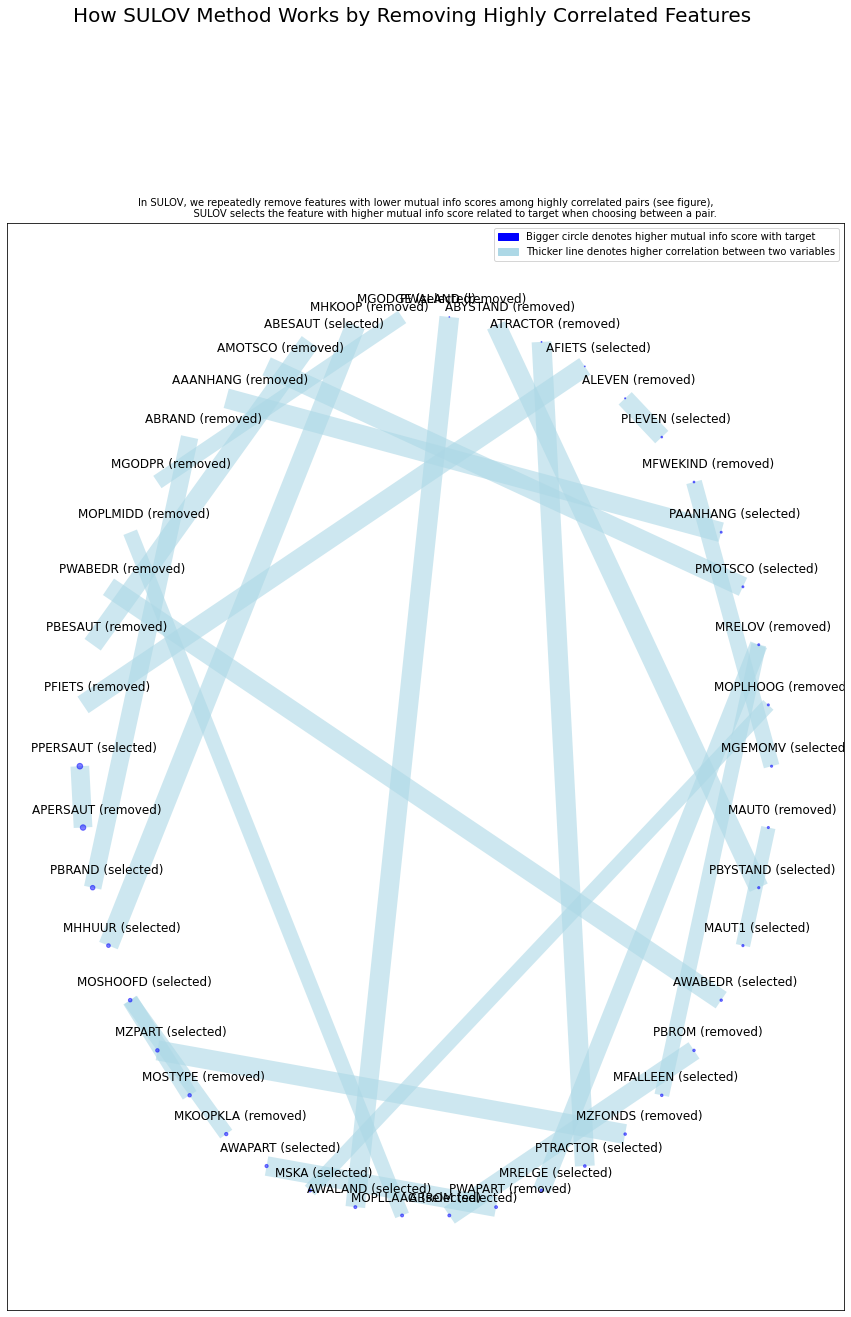

Time taken for SULOV method = 3 seconds
    Adding 0 categorical variables to reduced numeric variables  of 46
Final list of selected vars after SULOV = 46
############## F E A T U R E   S E L E C T I O N  ####################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 46 
    XGBoost version: 1.5.2
Number of booster rounds = 100
        using 46 variables...
            Time taken for regular XGBoost feature selection = 2 seconds
        using 37 variables...
            Time taken for regular XGBoost feature selection = 3 seconds
        using 28 variables...
            Time taken for regular XGBoost feature selection = 7 seconds
        using 19 variables...
            Time taken for regular XGBoost feature selection = 10 seconds
        using 10 variables...
            Time taken for regular XGBoost feature selection = 13 seconds
        using 1 variables...
            Time taken 

In [9]:
from featurewiz import FeatureWiz

features = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=1)
df_selected = features.fit_transform(X, y)

Featurewiz removed 23 highly-correlated variables, then selected 15 of the remaining uncorrelated variables as important.

In [10]:
## Print out list of selected features
features.features

['PPERSAUT',
 'AWALAND',
 'MOPLLAAG',
 'MINKGEM',
 'ABROM',
 'MOSHOOFD',
 'PBYSTAND',
 'AFIETS',
 'AWABEDR',
 'AWAPART',
 'PLEVEN',
 'MAUT1',
 'MGODGE',
 'MGEMOMV',
 'ABESAUT']

In [11]:
## Examine the dataframe of selected features
df_selected.head()

,PPERSAUT,AWALAND,MOPLLAAG,MINKGEM,ABROM,MOSHOOFD,PBYSTAND,AFIETS,AWABEDR,AWAPART,PLEVEN,MAUT1,MGODGE,MGEMOMV,ABESAUT
0,1.049762,-0.159942,1.076196,0.137927,-0.275223,-0.040809,-0.126494,-0.170982,-0.127484,-0.851759,-0.245317,1.292059,-0.161761,0.422163,-0.105365
1,-1.013240,-0.159942,-0.233971,0.898250,-0.275223,-0.040809,-0.126494,-0.170982,-0.127484,1.174040,-0.245317,0.636325,0.463133,-0.853461,-0.105365
2,1.049762,-0.159942,-0.233971,-0.622396,-0.275223,-0.040809,-0.126494,-0.170982,-0.127484,1.174040,-0.245317,0.636325,0.463133,-0.853461,-0.105365
3,1.049762,-0.159942,-1.107416,0.137927,-0.275223,0.424875,-0.126494,-0.170982,-0.127484,-0.851759,-0.245317,1.947792,0.463133,0.422163,-0.105365
4,-1.013240,-0.159942,-1.980861,1.658573,-0.275223,-1.461467,-0.126494,-0.170982,-0.127484,-0.851759,-0.245317,-0.019408,0.463133,1.697787,-0.105365


In [12]:
## Save dataframe of select features
df_selected.to_csv('../data/processed/caravan_features_selected.csv', index=False)